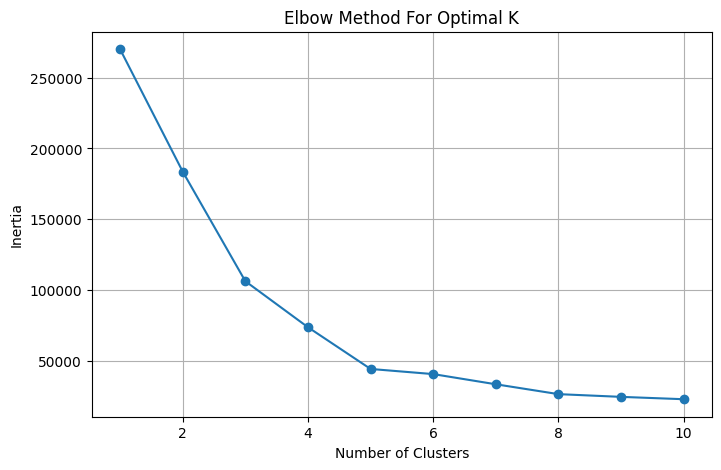

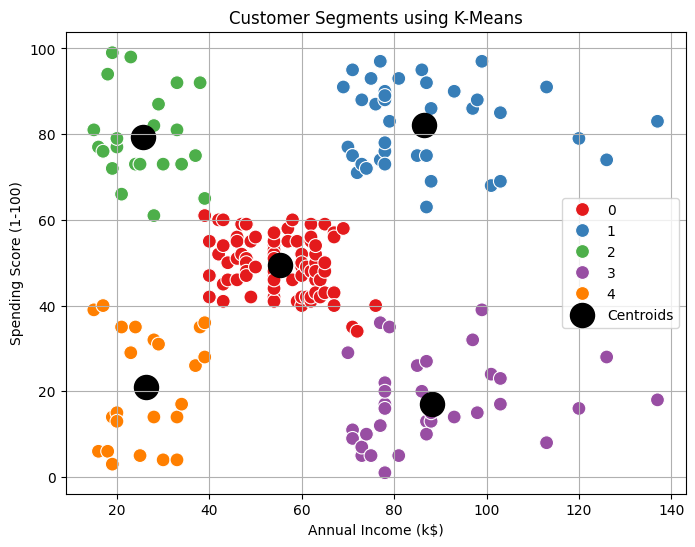


Silhouette Score: 0.5539


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
df.head()

df.drop('CustomerID', axis=1, inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

k_opt = 5
model = KMeans(n_clusters=k_opt, random_state=42)
y_kmeans = model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title("Customer Segments using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_kmeans)
print(f"\nSilhouette Score: {score:.4f}")
